In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dateutil

```bash
# Command to fetch requests matching "application/1" from "Chrome/37" User agent:
CMD="zegrep 'application/1.*Chrome/37' /var/log/syslog* | cut -d' ' -f1,2,3 | perl -pi -e 's|.*syslog.*?:||'"
ssh lion.ops $CMD  > boardman.csv
```

In [61]:
df = pd.read_csv("./boardman.csv", names=["datetime"])
df.datetime = df.datetime.apply(dateutil.parser.parse)
df.head()

,datetime
0,2016-05-18 06:42:07
1,2016-05-18 06:42:17
2,2016-05-18 06:42:52
3,2016-05-18 06:43:14
4,2016-05-18 06:43:28


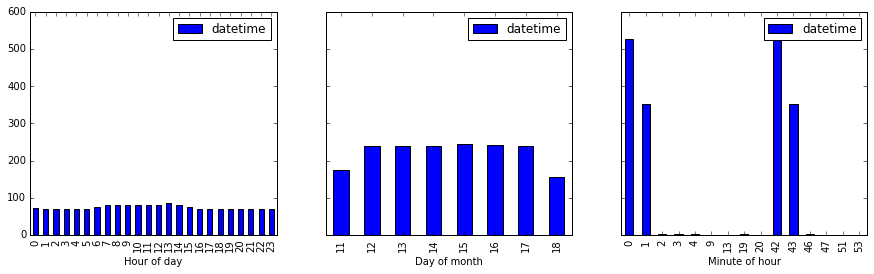

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,4))

df.groupby(df.datetime.dt.hour).count().plot(kind="bar", ax=axes[0]).set_xlabel("Hour of day")
df.groupby(df.datetime.dt.day).count().plot(kind="bar", ax=axes[1]).set_xlabel("Day of month")
df.groupby(df.datetime.dt.minute).count().plot(kind="bar", ax=axes[2]).set_xlabel("Minute of hour")